In [1]:
from preamble import *

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


### Scaling 방법에 따라 accuracy가 달라짐

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  # fit은 객체 내에 데이터를 연결해주기만 할 뿐 transform 은 따로 명령어를 수행해주어야 함.
# 데이터 변환
X_train_scaled = scaler.transform(X_train)

# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# X_scaled = scaler.fit(X_train).transform(X_train)
X_scaled_d = scaler.fit_transform(X_train)

### 차원 축소, 특성 추출, 매니폴드 학습
#### PCA

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\lib\s

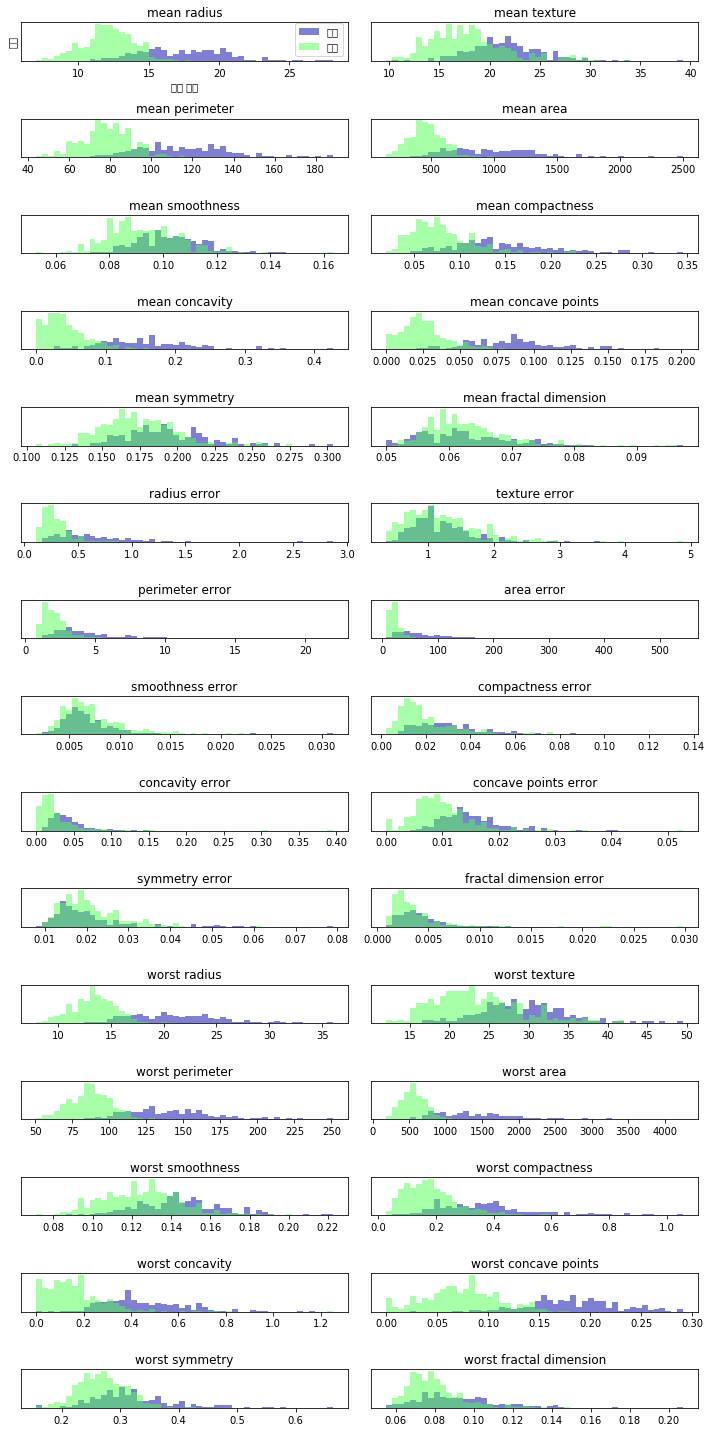

In [4]:
# PCA 분석 전, data에 대한 정보 파악하기 위해 시각화

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()  # list 로 받기

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)  # bins : 구간의 갯수 ( histogram은 연속형 )
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다 // 최적의 n_components 는 차라리 R로 확인하는 것이 효율적
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


### 비지도학습 모형은 accuracy를 측정할 지표가 따로 없음. 상업용으로 쓰기 위해선 dataset에 target_value가 포함되어 있어야 함. 


##### 고유얼굴 특성 추출

In [7]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)  # resize: 효율적인 메모리 사용을 위해 사이즈 조정 // min_faces_per_person : 20번 이상 나온 사람의 사진만 메모리에 load
people

{'data': array([[ 57.   ,  60.333,  78.   , ...,  17.333,  16.667,  22.667],
        [ 66.667,  80.667,  88.667, ...,   8.667,   8.333,   9.333],
        [ 18.667,  14.333,  15.   , ...,  22.667,  22.667,  25.667],
        ...,
        [ 77.333,  90.333,  93.333, ..., 233.667, 234.333, 230.667],
        [ 87.667,  71.667,  63.333, ...,  96.   ,  92.333,  96.333],
        [ 91.   ,  90.667,  94.667, ...,  40.333,  42.333,  42.333]],
       dtype=float32),
 'images': array([[[ 57.   ,  60.333,  78.   , ...,  40.667,  36.667,  34.   ],
         [ 52.667,  60.   ,  92.   , ...,  46.667,  36.   ,  30.   ],
         [ 46.   ,  66.   , 113.333, ...,  51.   ,  43.333,  37.667],
         ...,
         [ 61.   ,  62.667,  62.333, ...,  19.   ,  18.333,  18.667],
         [ 62.667,  64.667,  67.   , ...,  17.333,  18.   ,  22.333],
         [ 65.333,  68.   ,  67.   , ...,  17.333,  16.667,  22.667]],
 
        [[ 66.667,  80.667,  88.667, ...,  81.333,  78.667,  70.667],
         [ 66.333,  78. 

Batch size : 예를 들어, 이미지를 모델에 학습시킬 때, 각 instance(이미지 개체)들을 하나씩 학습시키는 것이 아닌 그룹을 지어 학습시키는 단위

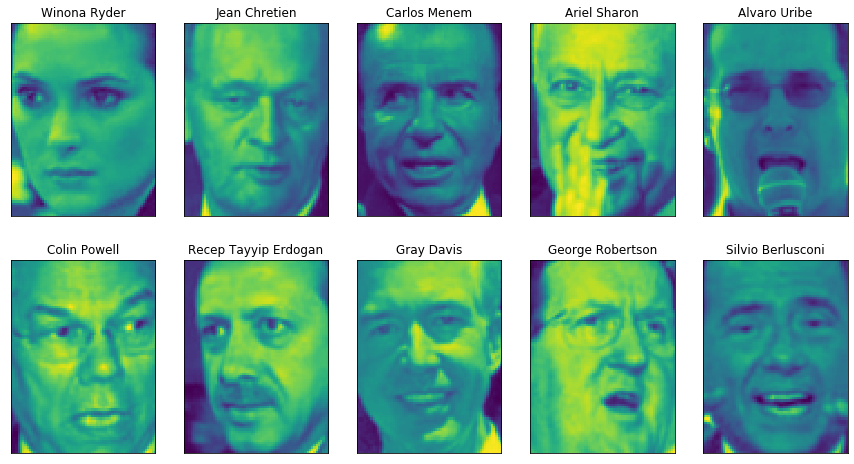

In [8]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [9]:
people.images.shape
# (높이, 행, 열)

(3023, 87, 65)

In [10]:
people.target[0:10], people.target_names[people.target[0:10]]

(array([61, 25,  9,  5,  1, 10, 48, 17, 13, 54], dtype=int64),
 array(['Winona Ryder', 'Jean Chretien', 'Carlos Menem', 'Ariel Sharon',
        'Alvaro Uribe', 'Colin Powell', 'Recep Tayyip Erdogan',
        'Gray Davis', 'George Robertson', 'Silvio Berlusconi'],
       dtype='<U25'))

In [11]:
print("people.images.shape:", people.images.shape)
print("클래스 개수:", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [12]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [13]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
#     where (code가 TRUE일 때) # 편중을 없애기 위해 사람마다 50개만 추출
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.